In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Raktikum_ML/Praktikum03/Data/stunting_wasting_dataset.csv')

In [4]:
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [5]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [6]:
df1 = (df[["Berat Badan (kg)","Jenis Kelamin","Umur (bulan)","Tinggi Badan (cm)"]]
     .rename(columns={"Jenis Kelamin":"jk","Umur (bulan)":"umur_bln",
               "Tinggi Badan (cm)": "tingi_cm", "Berat Badan (kg)": "berat_kg)"}).copy())

## Laki-laki: 1, Perempuan : 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg),jk,umur_bln,tingi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [7]:
# Hitung matriks korelasi
corr_matrix = df1.corr()

print(corr_matrix)

           berat_kg)        jk  umur_bln  tingi_cm
berat_kg)   1.000000  0.045797  0.665389  0.626005
jk          0.045797  1.000000  0.004046  0.073505
umur_bln    0.665389  0.004046  1.000000  0.875869
tingi_cm    0.626005  0.073505  0.875869  1.000000


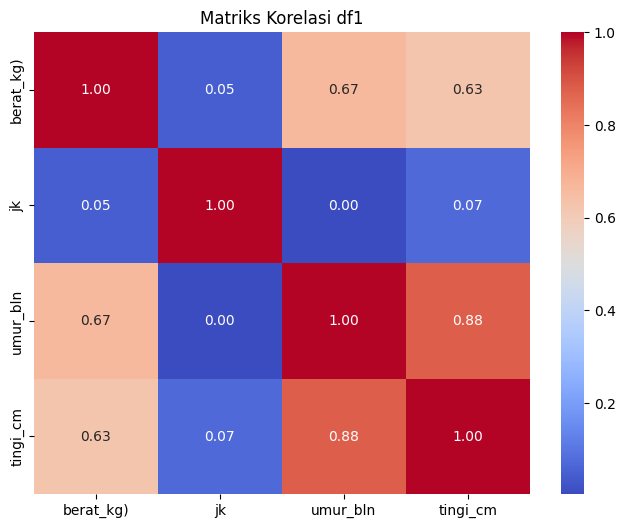

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan, # variabel dependen
y = df1["berat_kg)"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df1[["umur_bln", "tingi_cm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # random _state supaya hasil konsisten
)

## Cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

## cek apakah sudah ada constanta pada data training
X_train.head()

Jumlah data train : 80000
Jumlah data test  : 20000


,umur_bln,tingi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [10]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bln,tingi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [11]:
import statsmodels.api as sm

# Buat Model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')
const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tingi_cm']
# print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

-----------------------------
const       2.545617
umur_bln    0.229719
tingi_cm    0.054192
dtype: float64
-----------------------------
y = 2.546 + 0.230*x1 + 0.054*x2


In [12]:
# Tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              berat_kg)   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Sun, 12 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:51:19   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [27]:
import numpy as np
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    'Umur (bulan)': X_test['umur_bln'].to_numpy(),
    'Tinggi Badan (cm)': X_test['tingi_cm'].to_numpy(),
    'Berat Badan Aktual (kg)': y_test.to_numpy(),
    'Berat Badan Diprediksi': y_pred_test
})

hasil["Selisih error (kg)"] = hasil["Berat Badan Diprediksi"] - hasil["Berat Badan Aktual (kg)"]

denom = hasil["Berat Badan Aktual (kg)"].replace(0, np.nan)
hasil["akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

# Tampilkan tabel hasil prediksi
print(hasil)

       Umur (bulan)  Tinggi Badan (cm)  Berat Badan Aktual (kg)  \
75721             1               54.6                      7.0   
80184             8               66.0                     12.2   
19864            20               90.0                     10.9   
76699            13               82.4                      9.6   
92991            11               70.1                     13.2   
...             ...                ...                      ...   
32595             9               67.3                     11.8   
29313            15               80.2                      9.6   
37862             8               61.9                      8.0   
53421            12               74.9                      5.4   
42410            12               73.6                     13.9   

       Berat Badan Diprediksi  Selisih error (kg)  akurasi (%)  
75721                5.734226           -1.265774    81.917510  
80184                7.960047           -4.239953    65.246290  
